In [21]:
!pip install pyfit

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [0]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [0]:
# Using scikit-learn for data generation
from sklearn.datasets import make_classification

from pyfit.preprocessing import train_test_split
from pyfit.neighbors import KNeighborsClassifier
from pyfit.metrics import accuracy

In [0]:
def plot_decision_boundary(pred_func, X, y, figure=None):
    """Plot a decision boundary"""

    if figure is None:  # If no figure is given, create a new one
        plt.figure()
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

x_train: (100, 2). y_train: (100,)


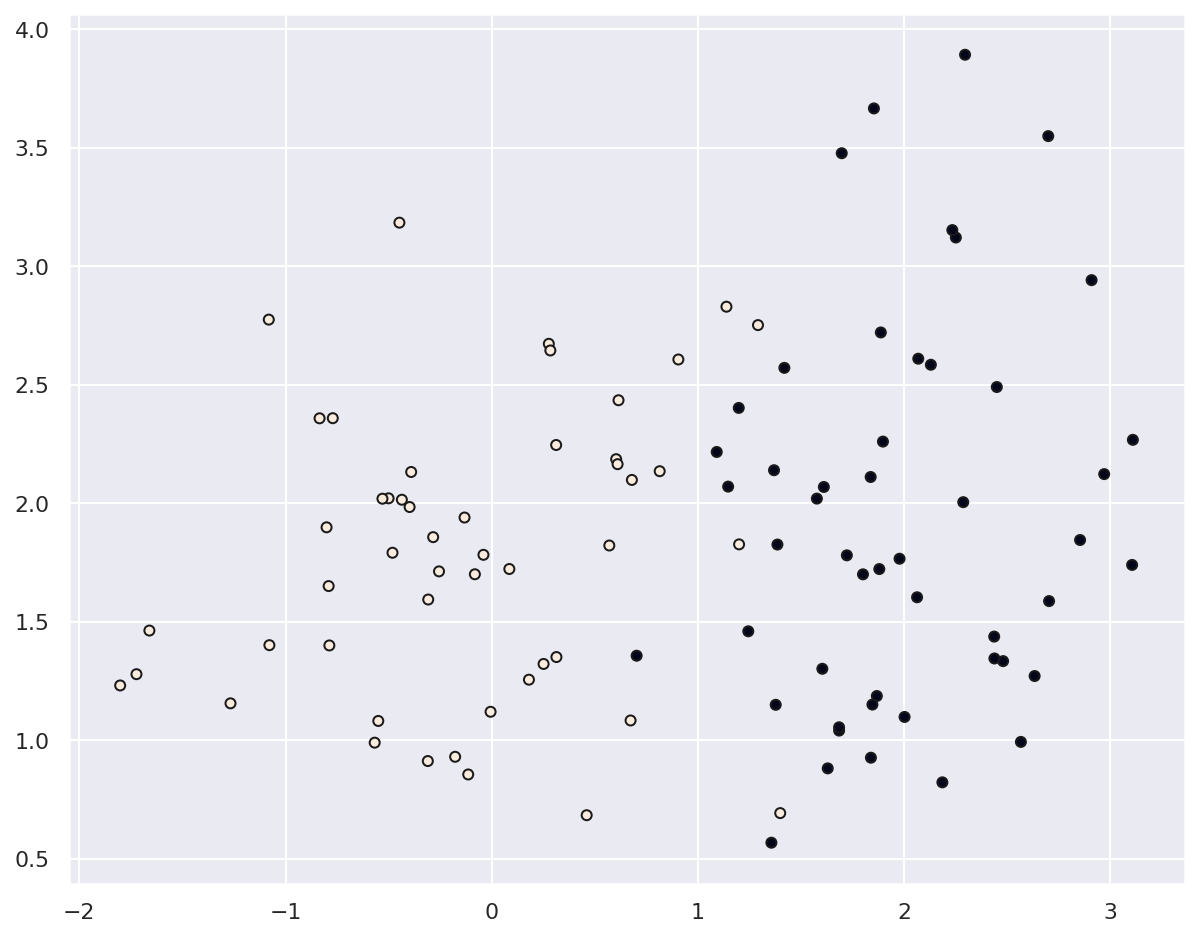

In [26]:
x_train, y_train = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

rng = np.random.RandomState(2)
x_train += 2 * rng.uniform(size=x_train.shape)

plt.scatter(x_train[:, 0], x_train[:, 1], marker="o", c=y_train, s=25, edgecolor="k")

print(f"x_train: {x_train.shape}. y_train: {y_train.shape}")

In [27]:
model = KNeighborsClassifier(k=5)
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
train_acc = accuracy(y_train, y_pred)
print(f'Training accuracy: {train_acc * 100:.2f}%')

Training accuracy: 97.00%


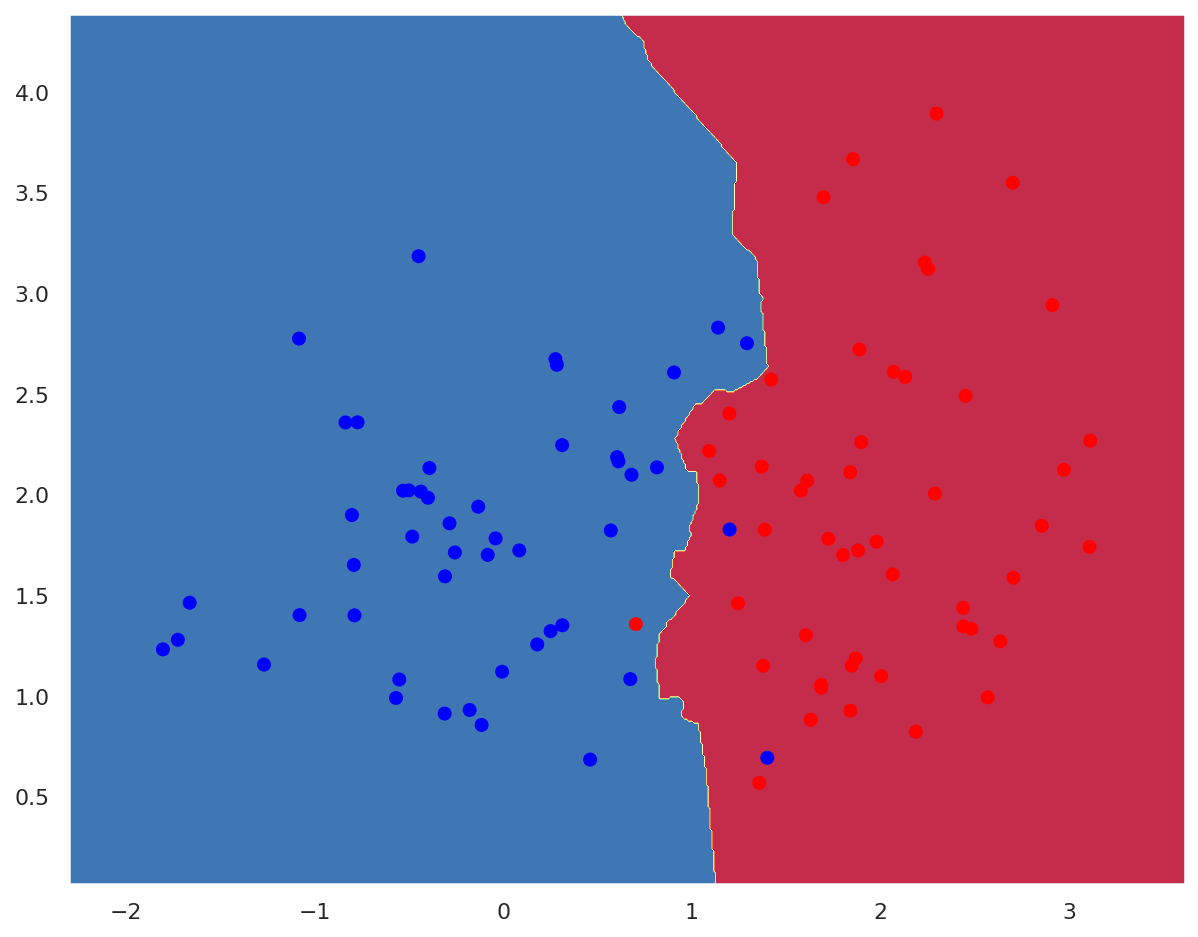

In [28]:
plot_decision_boundary(lambda x: np.array(model.predict(x)), x_train, y_train)